In [1]:
!pip install -q "cellpose[all]" imageio
import os, imageio.v3 as iio
from cellpose import models, io

def cellpose_infer(path, diameter=12, cellprob_threshold=-1.0, flow_threshold=0.6):
    img = iio.imread(path)
    img = 255 - img  # 粒が暗い場合だけ実行
    if img.ndim == 3: img = img[...,0]
    model = models.CellposeModel(model_type='cyto2')
    masks, flows, styles = model.eval(img, channels=(0,0),
                                      diameter=diameter,
                                      cellprob_threshold=cellprob_threshold,
                                      flow_threshold=flow_threshold)
    return img, masks


In [2]:
import matplotlib.pyplot as plt
img, masks = cellpose_infer('testB1.png', diameter=12)




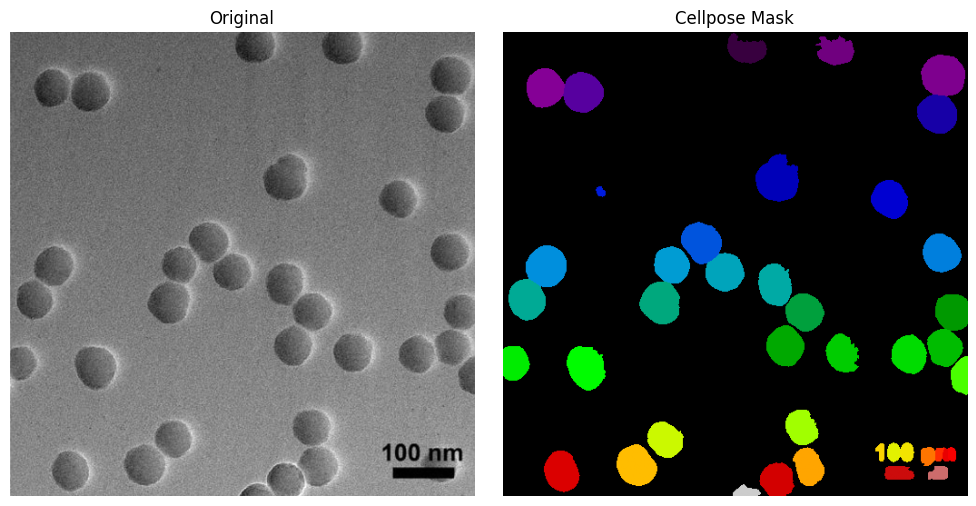

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(255-img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(masks, cmap='nipy_spectral'); plt.title('Cellpose Mask'); plt.axis('off')
plt.tight_layout(); plt.show()